# ***Iris Flower Prediction***

# *Classify iris flowers into three species based on petal and sepal measurements.*

## Step 1: Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.datasets import load_iris

# Step 2 : Load dataset.

In [4]:
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

In [5]:
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Step 3 : EDA

In [6]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [11]:
df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0
target,0


In [8]:
print("the length of dataset : ", len(df))

the length of dataset :  150


In [10]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


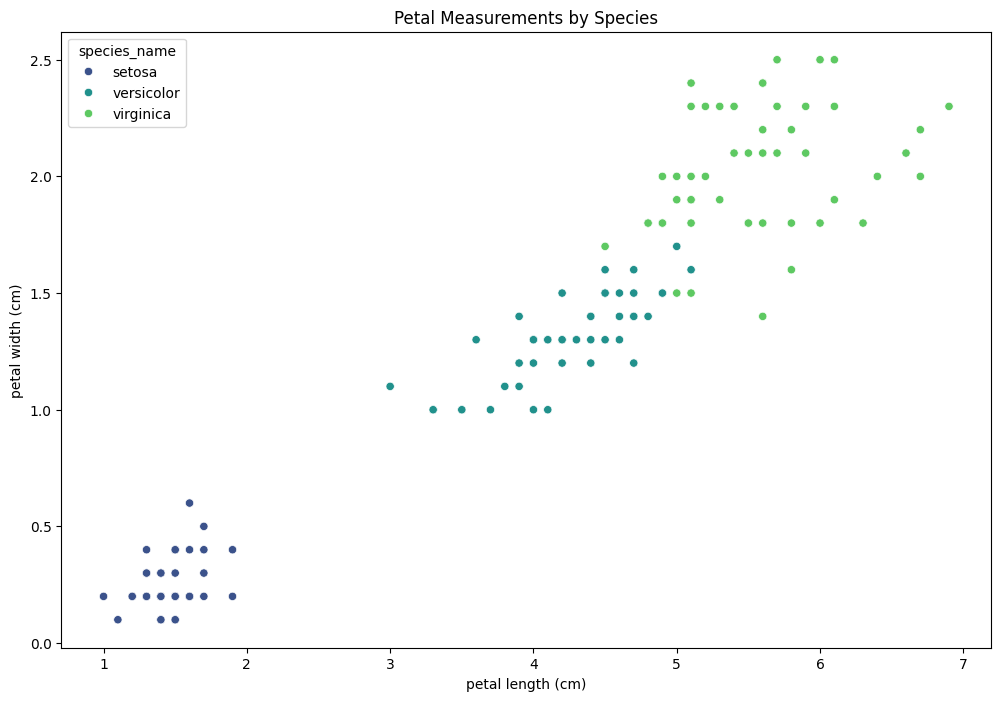

In [14]:
df['species_name'] = df['target'].apply(lambda x: target_names[x])

plt.figure(figsize=(12, 8))
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', hue='species_name', data=df, palette='viridis')
plt.title('Petal Measurements by Species')
plt.show()

### The data is well-structured, and there is no missing and non-numarical value.

# Step 4 : Feature scalling

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5 : Train-Test Split.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 6 : Train Model.

### Logistic Regression classifires.

In [21]:
from sklearn.linear_model import LogisticRegression

In [25]:
logistic_reg = LogisticRegression()
logistic_reg.fit(X_train, y_train)

LogisticRegression()

In [27]:
logistic_predict = logistic_reg.predict(X_test)
print(logistic_predict)

[1 0 2 1 1 0 1 2 1 1 2 0 0 0 0 1 2 1 1 2 0 2 0 2 2 2 2 2 0 0]


In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
print("Accuracy : ", accuracy_score(y_test, logistic_predict))

Accuracy :  1.0


In [30]:
print(confusion_matrix(y_test, logistic_predict))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [31]:
print(classification_report(y_test, logistic_predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



# confusion matrix

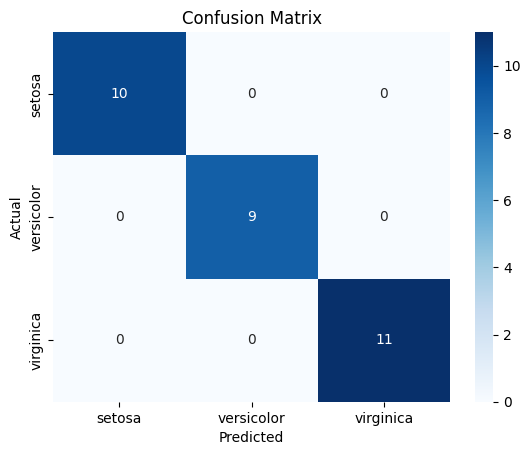

In [34]:
cm = confusion_matrix(y_test, logistic_predict)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()